In [1]:
import PyPDF2 

try:
    from urllib import urlretrieve as urlretrieve
except ImportError:
    from urllib.request import urlretrieve as urlretrieve    

import os

#import matplotlib as plt
import pylab as pl

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
url = []
url.append('https://github.com/fedhere/UInotebooks/raw/master/slides2018/UI1_PUI2018.pdf')
url.append('https://github.com/fedhere/UInotebooks/raw/master/slides2018/UI2_PUI2018.pdf')
url.append('https://github.com/fedhere/UInotebooks/raw/master/slides2018/UI3_PUI2018.pdf')
url.append('https://github.com/fedhere/UInotebooks/raw/master/slides2018/UI4_PUI2018.pdf')
url.append('https://github.com/fedhere/UInotebooks/raw/master/slides2018/UI5_PUI2018.pdf')
url.append('https://github.com/fedhere/UInotebooks/raw/master/slides2018/Geospatial_Analysis_in_Python.pdf')
url.append('https://github.com/fedhere/UInotebooks/raw/master/slides2018/UI7_PUI2018.pdf')
url.append('https://github.com/fedhere/UInotebooks/raw/master/slides2018/UI8_PUI2018.pdf')
url.append('https://github.com/fedhere/UInotebooks/raw/master/slides2018/SQL_Lecture_Lab.pdf')
url.append('https://github.com/fedhere/UInotebooks/raw/master/slides2018/UI9_PUI2018.pdf')
url.append('https://github.com/fedhere/UInotebooks/raw/master/slides2018/UI10_PUI2018.pdf')
url.append('https://github.com/fedhere/UInotebooks/raw/master/slides2018/UI11_PUI2018.pdf')
url.append('https://github.com/fedhere/UInotebooks/raw/master/slides2018/UI13_PUI2018.pdf')


In [3]:
### This function downloads the pdf file, moves it into the PUIdata and reads it into a dataframe
def getPdfUrl(url,pdfFile):
    #csvFile = 'file.csv'
    urlretrieve(url, pdfFile)
    os.system("mv " + pdfFile + ' ' + os.getenv("PUIDATA"))
    #csvFilePath = os.getenv('PUIDATA') + '/' + csvFile
    #return pd.read_csv(csvFilePath)

In [4]:
## https://www.geeksforgeeks.org/working-with-pdf-files-in-python/

def extractText(pdfFilePath):
    # creating a pdf file object 
    pdfFileObj = open(pdfFilePath, 'rb') 

    # creating a pdf reader object 
    pdfReader = PyPDF2.PdfFileReader(pdfFileObj) 
  
    # printing number of pages in pdf file 
    n = pdfReader.numPages

    text = ""
    for i in range(n):
        # creating a page object 
        pageObj = pdfReader.getPage(i)
    
        # extracting text from page 
        text += pageObj.extractText()
 
    # closing the pdf file object 
    pdfFileObj.close() 
    
    return text

In [5]:
fileNames = ['UI'+str(i) for i in range(1,len(url) + 1)]

In [6]:
texts = []
AllText = ''
for i in range(len(url)):
    getPdfUrl(url[i],fileNames[i])
    pdfFilePath = os.getenv('PUIDATA') + '/' + fileNames[i]
    txt = extractText(pdfFilePath)
    texts.append(txt)
    AllText += txt

In [7]:
from wordcloud import WordCloud

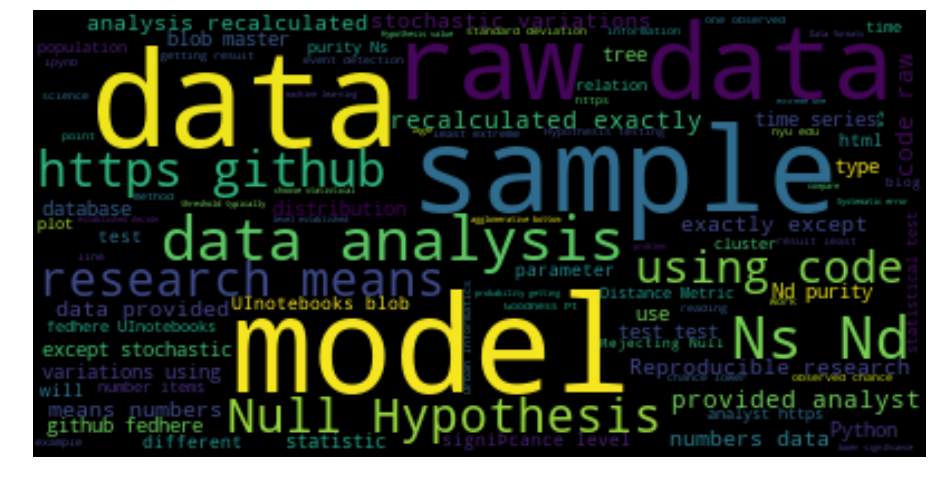

In [8]:
wordcloud = WordCloud(max_font_size=60).generate(AllText)
pl.figure(figsize=(16,12))
# plot wordcloud in matplotlib
pl.imshow(wordcloud, interpolation="bilinear")
_=pl.axis("off")
#plt.show()

In [9]:
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords 

In [10]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /nfshome/fb55/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /nfshome/fb55/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
tokens = word_tokenize(AllText)

In [13]:
stop_words = list(set(stopwords.words('english')))

In [14]:
stop_words.append('https')
stop_words.append('http')

In [15]:
words = [word.lower() for word in tokens if word.lower() not in stop_words and word.isalpha() ]

In [16]:
freqdist = nltk.FreqDist(words)

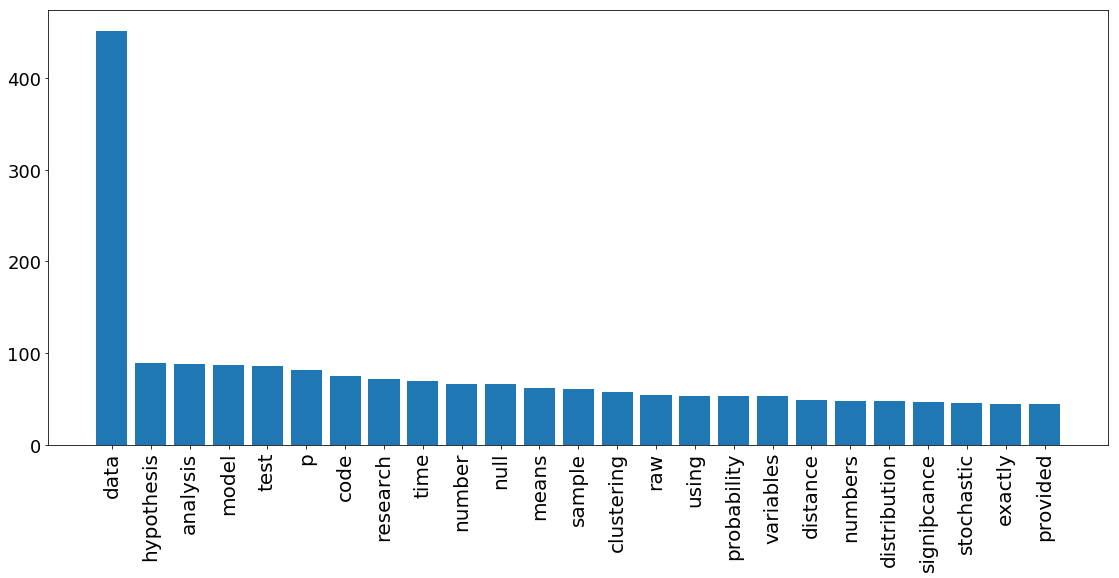

In [17]:
pl.rcParams["font.size"] = 18
ax = pl.figure(figsize=(19,8)).subplots(1)
pl.bar(range(25), np.array(freqdist.most_common(25))[:,1].astype(int))
ax.set_xticks(range(25))
ax.set_xticklabels(np.array(freqdist.most_common(25))[:,0], rotation=90,
                  fontsize=20);

In [18]:
topics = [word for word, count in freqdist.most_common(25)]

In [19]:
topics

['data',
 'hypothesis',
 'analysis',
 'model',
 'test',
 'p',
 'code',
 'research',
 'time',
 'number',
 'null',
 'means',
 'sample',
 'clustering',
 'raw',
 'using',
 'probability',
 'variables',
 'distance',
 'numbers',
 'distribution',
 'signiþcance',
 'stochastic',
 'exactly',
 'provided']

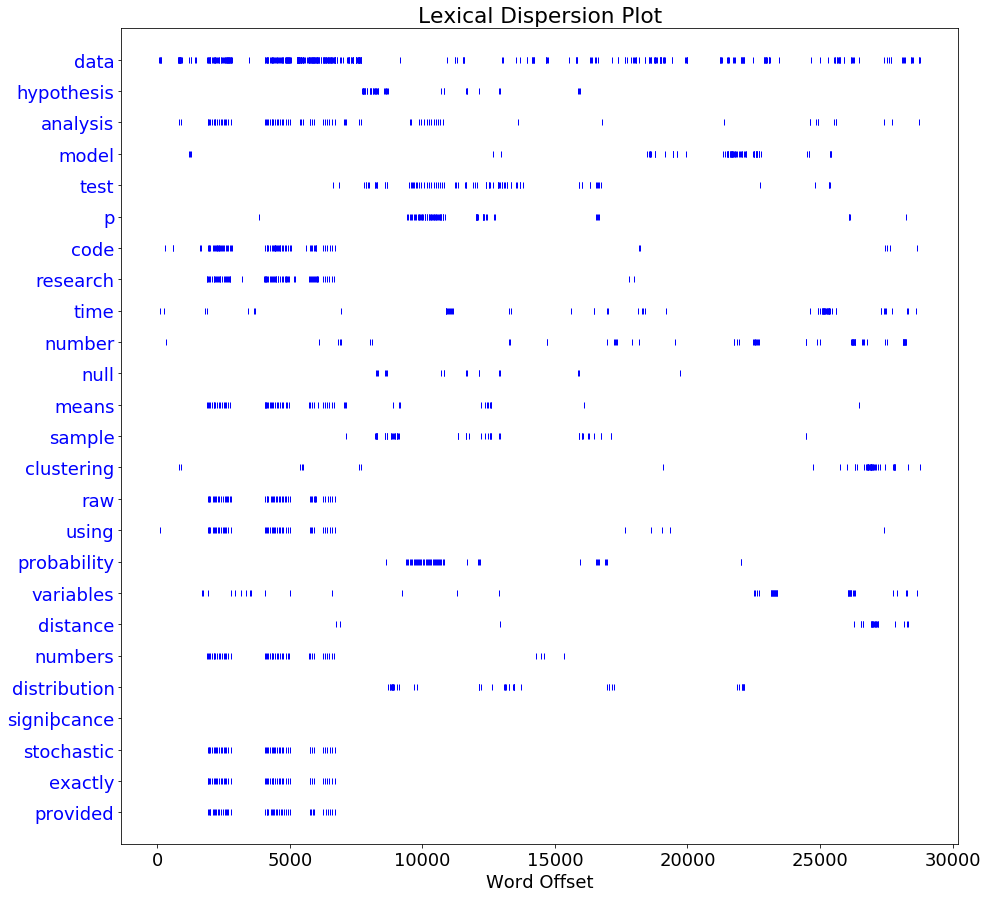

In [20]:
from nltk.draw.dispersion import dispersion_plot
pl.figure(figsize=(15,15))
dispersion_plot(tokens,topics)

In [21]:
# source code of the image from: https://www.nltk.org/_modules/nltk/draw/dispersion.html

def dispersion_plot_custom(text, words, groups,
                           groupShapeColors, ignore_case=False, 
                           title="Lexical Dispersion Plot"):
    """
    Generate a lexical dispersion plot.

    :param text: The source text
    :type text: list(str) or enum(str)
    :param words: The target words
    :type words: list of str
    :param ignore_case: flag to set if case should be ignored when searching text
    :type ignore_case: bool
    """

    try:
        from matplotlib import pylab
    except ImportError:
        raise ValueError('The plot function requires matplotlib to be installed.'
                     'See http://matplotlib.org/')

    text = list(text)
    words.reverse()
    print(words)

    if ignore_case:
        words_to_comp = list(map(str.lower, words))
        text_to_comp = list(map(str.lower, text))
    else:
        words_to_comp = words
        text_to_comp = text

    points = [(x,y) for x in range(len(text_to_comp))
                    for y in range(len(words_to_comp))
                    if text_to_comp[x] == words_to_comp[y]]
    if points:
        x, y = list(zip(*points))
    else:
        x = y = ()
        
    x=list(x)
    y=list(y)
    L=len(text)
 

    for i in range(groups):
        xT = [j for j in x if j >= (i*L/groups) 
              and j< ((i+1)*(L/groups))]
        yT = [y[yi] for yi,j in enumerate(x) 
              if j >= (i*L/groups) and j< ((i+1)*(L/groups))]
        pylab.plot(xT, yT, look[i], ms=30, scalex=.1)

    pylab.yticks(list(range(len(words))), words, 
                 color="k", fontsize=20)
    pylab.ylim(-1, len(words))
    pylab.xlim(-1, 29000)
    pylab.title(title, fontsize = 20)
    #pylab.xlabel("Word Offset", fontsize=20)
    pylab.xticks([])
    pylab.legend()
    #pylab.show()



['provided', 'exactly', 'stochastic', 'signiþcance', 'distribution', 'numbers', 'distance', 'variables', 'probability', 'using', 'raw', 'clustering', 'sample', 'means', 'null', 'number', 'time', 'research', 'code', 'p', 'test', 'model', 'analysis', 'hypothesis', 'data']


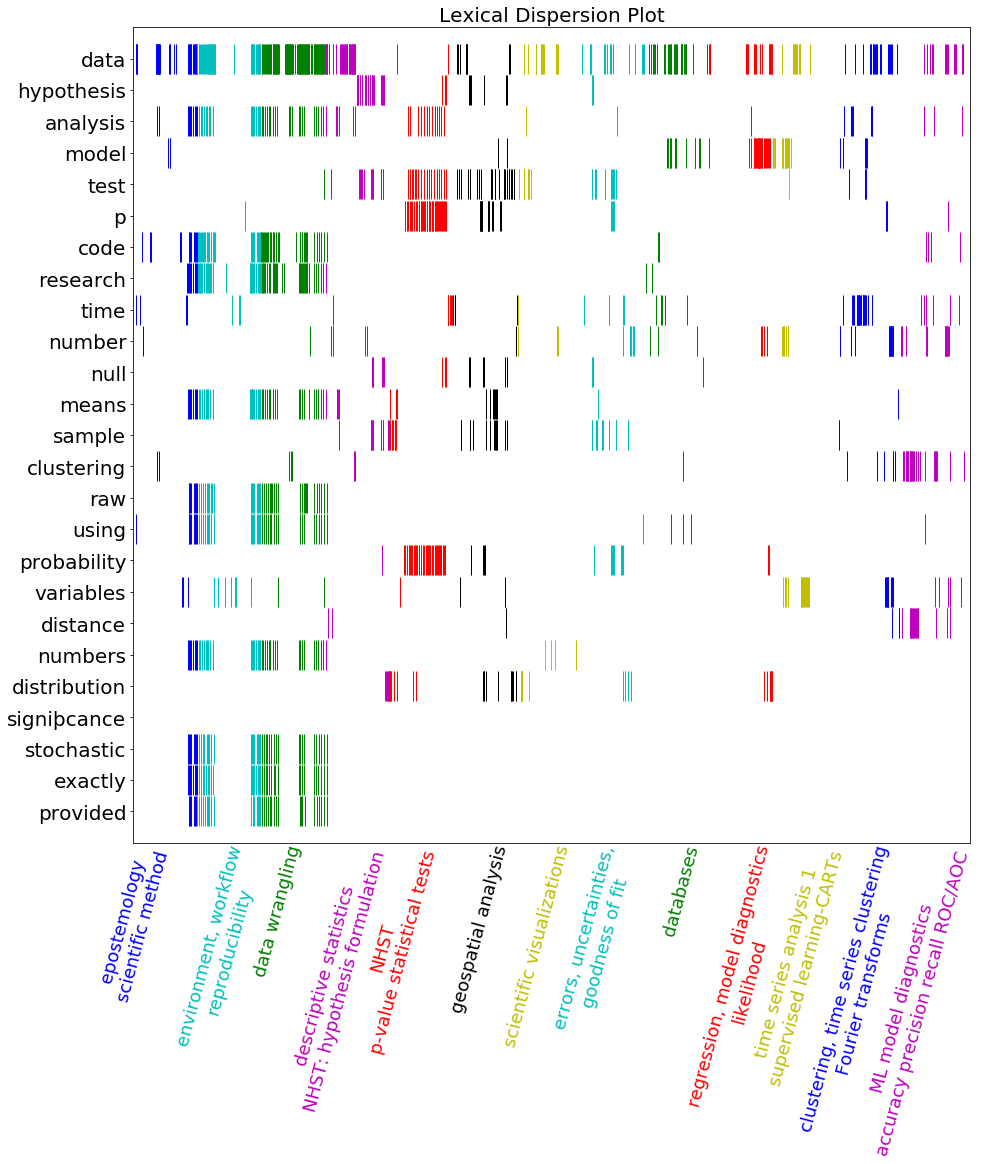

In [30]:
lectures = 13
look = ["b|","c|","g|","m|","r|","k|","y|",
        "c|","g|","r|","y|","b|","m|"]
#look = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', 
#        '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', 
 #       '#008080', '#e6beff', '#9a6324']#, '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff', '#000000']


pl.figure(figsize=(15,15))
dispersion_plot_custom(tokens, topics, lectures, look)
pl.text(0,-1, "epostemology\nscientific method", rotation=75, 
        ha='center', va='top', color=look[0][:-1])
pl.text(3000,-1, "environment, workflow\nreproducibility", rotation=75,
        ha='center', va='top', color=look[1][:-1])
pl.text(5000,-1, "data wrangling", rotation=75,
        ha='center', va='top', color=look[2][:-1])
pl.text(7000,-1, "descriptive statistics\nNHST: hypothesis formulation", rotation=75,
        ha='center', va='top', color=look[3][:-1])
pl.text(9000,-1, "NHST\np-value statistical tests", rotation=75,
        ha='center', va='top', color=look[4][:-1])
pl.text(12000,-1, "geospatial analysis", rotation=75,
        ha='center', va='top', color=look[5][:-1])
pl.text(14000,-1, "scientific visualizations", rotation=75,
        ha='center', va='top', color=look[6][:-1])
pl.text(16000,-1, "errors, uncertainties,\ngoodness of fit", rotation=75,
        ha='center', va='top', color=look[7][:-1])
pl.text(19000,-1, "databases", rotation=75,
        ha='center', va='top', color=look[8][:-1])
pl.text(21000,-1, "regression, model diagnostics\nlikelihood", rotation=75,
        ha='center', va='top', color=look[9][:-1])
pl.text(23000,-1, "time series analysis 1\nsupervised learning-CARTs", rotation=75,
        ha='center', va='top', color=look[10][:-1])
pl.text(25000,-1, "clustering, time series clustering\nFourier transforms", rotation=75,
        ha='center', va='top', color=look[11][:-1])
pl.text(27000,-1, "ML model diagnostics\naccuracy precision recall ROC/AOC", rotation=75,
        ha='center', va='top', color=look[12][:-1])
pl.savefig("dispersion.png")

In [23]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /nfshome/fb55/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [24]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
sentiment_score = []
sentiment_score_all = []

for t in texts:
    sentences = nltk.tokenize.sent_tokenize(t)
    s = []
    for sentence in sentences:
        s.append(sid.polarity_scores(sentence)["compound"])
    sentiment_score.append(np.mean(s))
    sentiment_score_all+=s

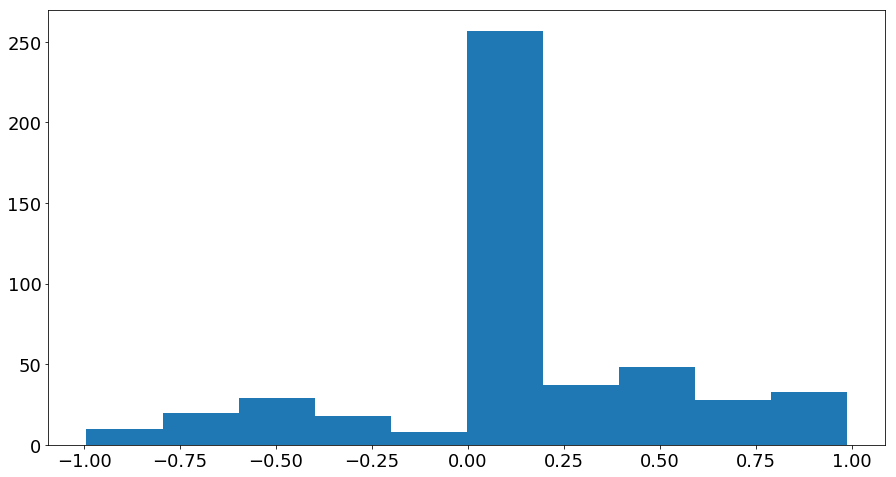

In [25]:
pl.figure(figsize=(15,8))
_=pl.hist(sentiment_score_all)

In [26]:
len(sentiment_score)

13

ValueError: shape mismatch: objects cannot be broadcast to a single shape

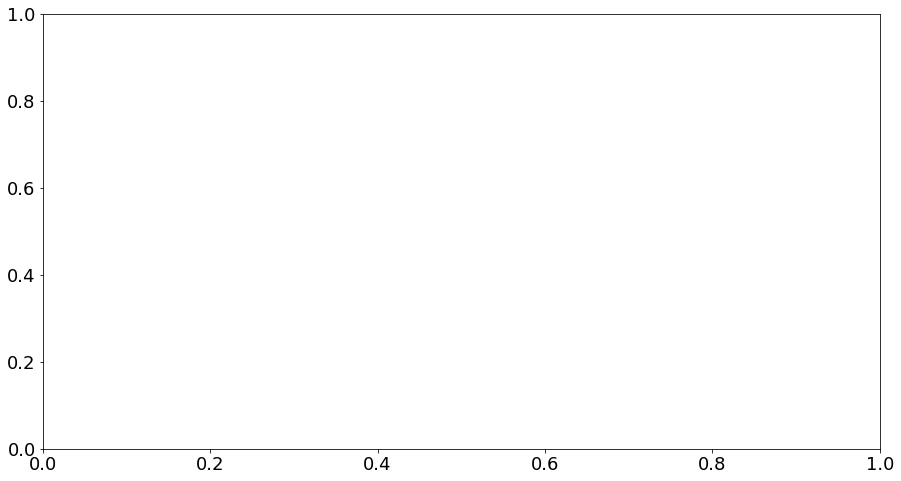

In [27]:
pl.figure(figsize=(15,8))
pl.bar(range(1,13),sentiment_score)
pl.xlabel('Lecture Number', fontsize=20)
pl.ylabel('Sentiment Score', fontsize=20)

In [ ]:
vocab =[word for word, count in freqdist.most_common(50)]

In [ ]:
def getWordDict():
    d = {}
    for w in vocab:
        d[w]=0
    return d

In [ ]:
listFeatures = []

for i in range(len(texts)):
    d = getWordDict()
    tok = word_tokenize(texts[i])
    w = [word for word in tok if word.lower() not in stop_words and word.isalpha()]
    freq = nltk.FreqDist(w)
    for k in d.keys():
        #print(k)
        #print(freq[k])
        d[k] = freq[k]
    d['Lecture'] = 'UI-'+str(i)
    listFeatures.append(d)

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame(listFeatures)
df.head(8)

In [ ]:
newDF = pd.DataFrame(P)
# First two components
newDF = newDF[[0,1]]
newDF.columns = ['one','two']
newDF['Lecture'] = df['Lecture']
newDF.head(6)

In [ ]:
import seaborn as sn

sn.scatterplot(x='one',y='two',hue="Lecture",data=newDF)